## Рубежный контроль №1
## Корецкий Константин ИУ5-61Б Вариант 6

Для студентов групп ИУ5-61Б, ИУ5Ц-81Б - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

Задача №4.

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Набор данных №6

https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?resource=download

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
list(df.columns)

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [12]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [23]:
df.isna().sum()
# пустых значений нету, значит надо добавить

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [31]:
df_with_missing = df.mask(np.random.random(df.shape) < 0.02)
print(df_with_missing.isna().sum())
print(df_with_missing.shape)
# теперь есть пустые значения, надо из удалить


Serial No.            8
GRE Score             7
TOEFL Score           8
University Rating    14
SOP                  12
LOR                  11
CGPA                  5
Research              9
Chance of Admit      11
dtype: int64
(500, 9)


In [34]:
df_with_missing = df_with_missing.dropna()
print(df_with_missing.isna().sum())
# удалили пустые значения
print(df_with_missing.shape)
# после удаления количество строк уменьшилось

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
(423, 9)


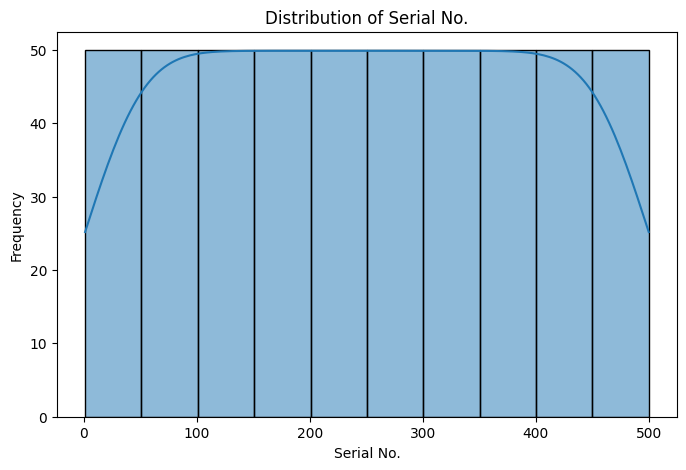

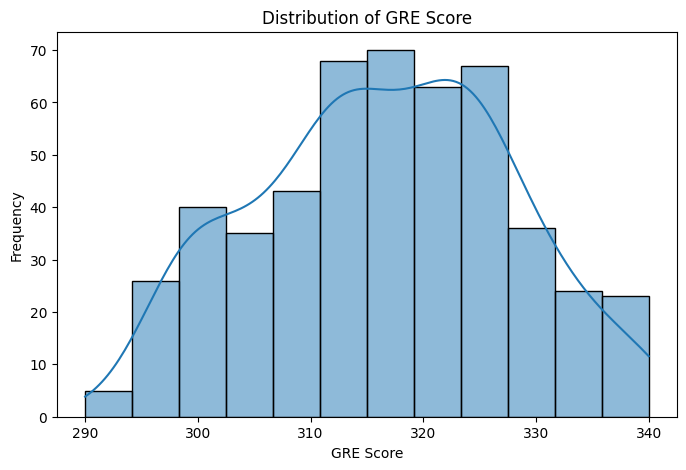

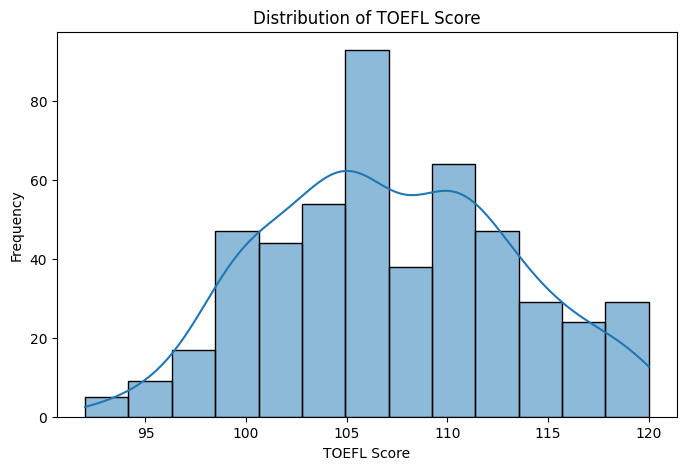

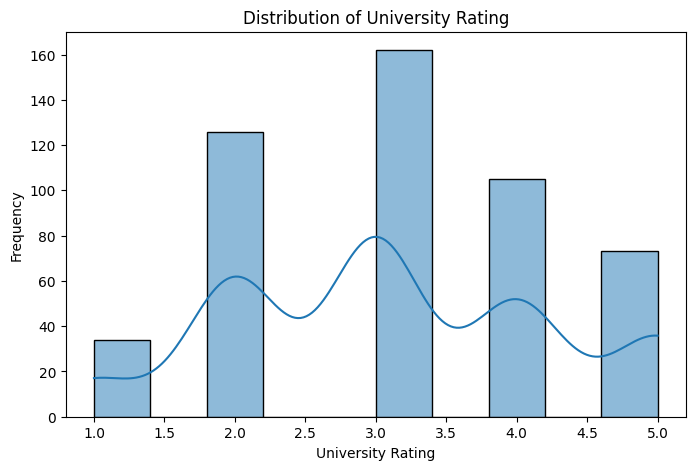

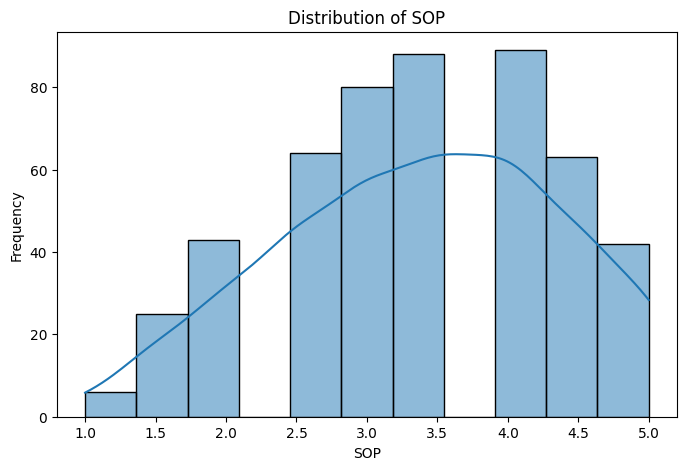

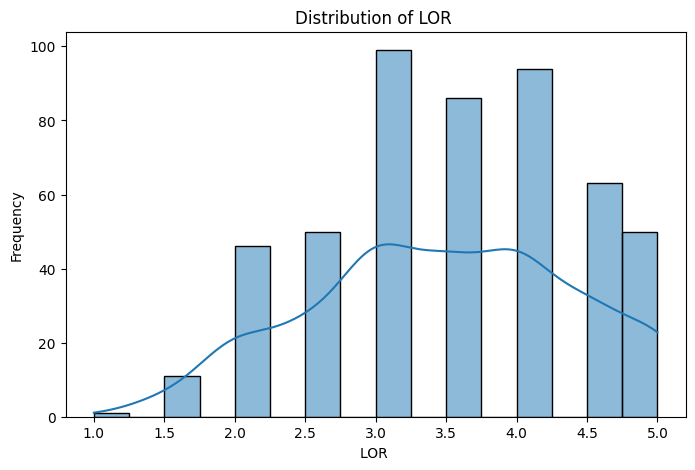

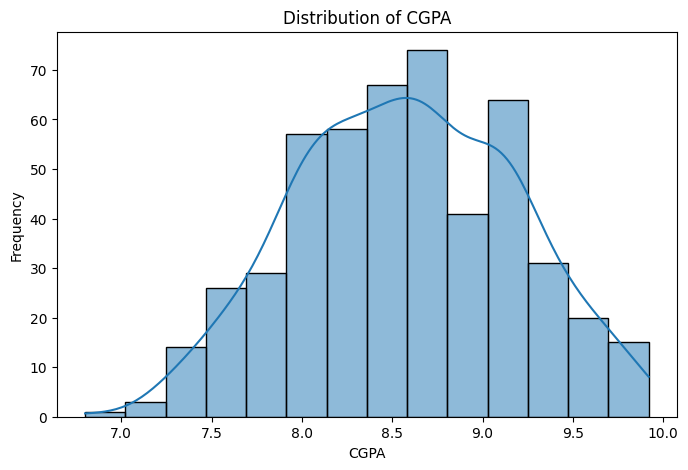

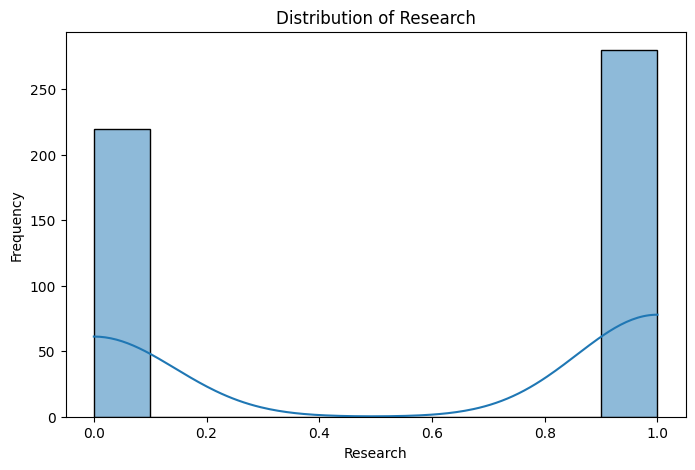

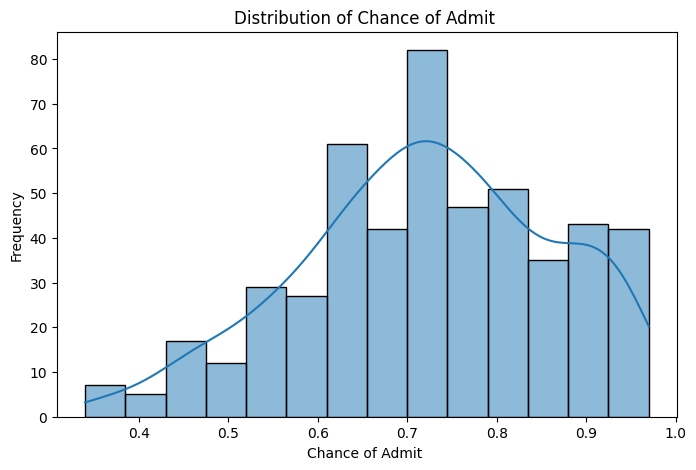

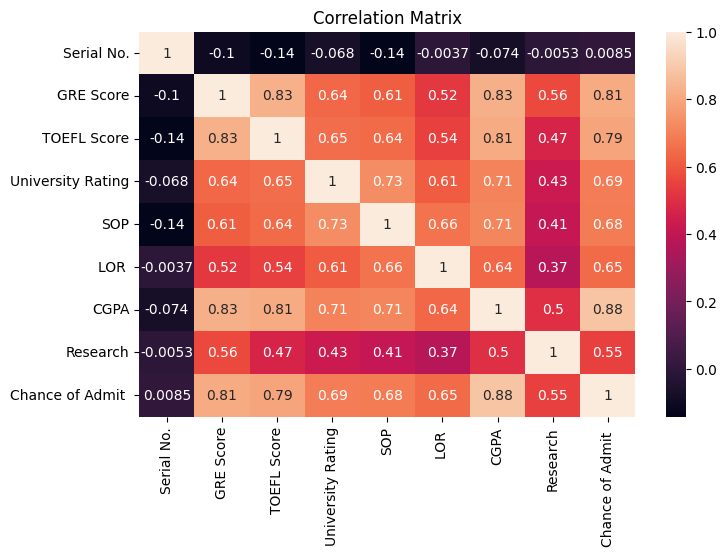

In [43]:
# распределения всех столбиков
for c in list(df.columns):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[c], kde=True)
    plt.title(f'Distribution of {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()

# матрица корреляции
plt.figure(figsize=(8, 5))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

Из графиков видно:
- в среднем студенты набирают 105-110 баллов, распределение которых является гауссовым
- оценка за рекомендательное письмо (LOR - Letter Of Recommendation) очень редко бывает низкой и достаточно сильно коррелирует с вступительным эссе (SOP - Statement Of Purpose)
- шанс поступления зависит от оценки за знание английского языка (TOEFL Score) и от оценки за общий экзамен (GRE Score), что в принципе очевидно 🙂